In [1]:
import calour as ca

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ca.set_log_level(11)

In [18]:
%matplotlib widget

In [5]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### dataset from:
Hägglund M., Bäckman S., Macellaro A., Lindgren P., Borgmästars E., Jacobsson K., Dryselius R., Stenberg P., Sjödin A., Forsman M. et al. .

Accounting for bacterial overlap between raw water communities and contaminating sources improves the accuracy of signature-based microbial source tracking.

Front.Microbiol. 2018; 9:2364.

(used for the dbBact NAR paper figure 3F)

In [6]:
dat=ca.read_amplicon('./data/fig3-stats/all.feces-source.biom','./data/fig3-stats/map.feces-source.txt',normalize=10000,min_reads=1000)

2023-09-27 16:14:52 INFO loaded 284 samples, 26811 features
2023-09-27 16:14:52 INFO Loaded 284 samples, 26811 features
2023-09-27 16:14:52 INFO After filtering, 282 samples remaining.


In [8]:
datc.sample_metadata.host.value_counts()

cow               16
pig               11
dog               11
cat               10
not applicable     8
deer               7
raccoon            1
rabbit             1
ruminant           1
Name: host, dtype: int64

# We will look at hosts that have >5 samples

In [12]:
datc=datc.filter_samples('host',['cow','pig','dog','cat','deer'])

## remove the ASVs appearing <10 reads total in all sample

In [11]:
datc=datc.filter_sum_abundance(10)

2023-09-27 16:16:14 INFO After filtering, 4470 features remaining.


# Let's add for each ASV the associted term with the highest f-score out of a given list:
We will use the terms:
* canis lupus familiaris
* felis catus
* homo sapiens
* sus scrofa
* bos taurus
* soil
* water

Note that this can take a few minutes, as we have ~5000 ASVs

The result is stored in the "common_term" field of the experiment.feature_metadata

In [13]:
datc=datc.add_terms_to_features('dbbact',['canis lupus familiaris', 'felis catus', 'sus scrofa', 'bos taurus', 'homo sapiens', 'deer', 'soil', 'water'])

2023-09-27 16:19:27 INFO Getting dbBact annotations for 4470 sequences, please wait...
2023-09-27 16:19:42 INFO got 5845 annotations
2023-09-27 16:19:42 INFO Got 136342 annotation-sequence pairs
2023-09-27 16:19:42 INFO Added annotation data to experiment. Total 5845 annotations, 4470 ASVs


In [14]:
datc.feature_metadata['common_term'].value_counts()

na                        2218
bos taurus                 688
sus scrofa                 496
deer                       400
homo sapiens               328
canis lupus familiaris     109
other                       98
soil                        58
water                       44
felis catus                 31
Name: common_term, dtype: int64

## Let's sort the features according to the term and then plot a heatmap

In [15]:
datc=datc.sort_by_metadata('common_term',axis='f')

In [21]:
datc=datc.sort_samples('host')

2023-09-27 16:25:55 WARNING You need to set up jupyter notebook with `%matplotlib notebook`


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px'))

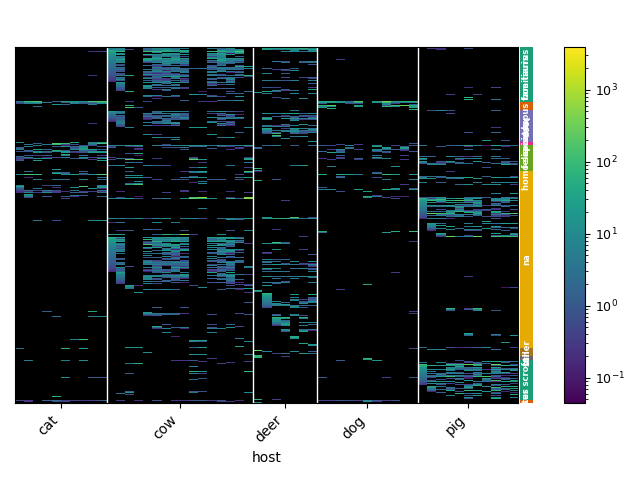

In [23]:
f=datc.plot(sample_field='host',gui='jupyter',bary_fields=['common_term'])